In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pyasdf
import obspy
from obspy.geodetics.base import gps2dist_azimuth,kilometer2degrees
from obspy.taup import TauPyModel

%matplotlib inline

model = TauPyModel(model="ak135")

In [139]:
data=pyasdf.ASDFDataSet("/Users/ziyixi/work/Japan_Slab_code/data/asdf_files/compare_data_processing/201105101526A.data.h5",mode="r")
sync_old=pyasdf.ASDFDataSet("/Users/ziyixi/work/Japan_Slab_code/data/asdf_files/compare_data_processing/201105101526A.sync_old.h5",mode="r")

In [140]:
data

ASDF file [format version: 1.0.2]: '../../data/asdf_files/compare_data_processing/201105101526A.data.h5' (4.5 GB)
	Contains 1 event(s)
	Contains waveform data from 1209 station(s).

In [141]:
sync_old

ASDF file [format version: 1.0.2]: '../../data/asdf_files/compare_data_processing/201105101526A.sync_old.h5' (577.0 MB)
	Contains 1 event(s)
	Contains waveform data from 1962 station(s).

In [142]:
data.waveforms["BO.WJM"].raw

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:24:08.000000Z - 2011-05-10T16:06:07.950000Z | 20.0 Hz, 50400 samples
BO.WJM..BHN | 2011-05-10T15:24:08.000000Z - 2011-05-10T16:06:07.950000Z | 20.0 Hz, 50400 samples
BO.WJM..BHZ | 2011-05-10T15:24:08.000000Z - 2011-05-10T16:06:07.950000Z | 20.0 Hz, 50400 samples

## Do some necessary preprocessing

In [143]:
event = data.events[0]
origin = event.preferred_origin() or event.origins[0]
event_time = origin.time
event_latitude = origin.latitude
event_longitude = origin.longitude
event_depth=origin.depth

In [144]:
BO_WJM=data.waveforms["BO.WJM"].raw.copy()

In [145]:
BO_WJM.trim(event_time,event_time+1800)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples

In [146]:
BO_WJM.detrend("demean")
BO_WJM.detrend("linear")
BO_WJM.taper(max_percentage=0.05,type="hann")

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples

In [147]:
inv=data.waveforms["BO.WJM"].StationXML

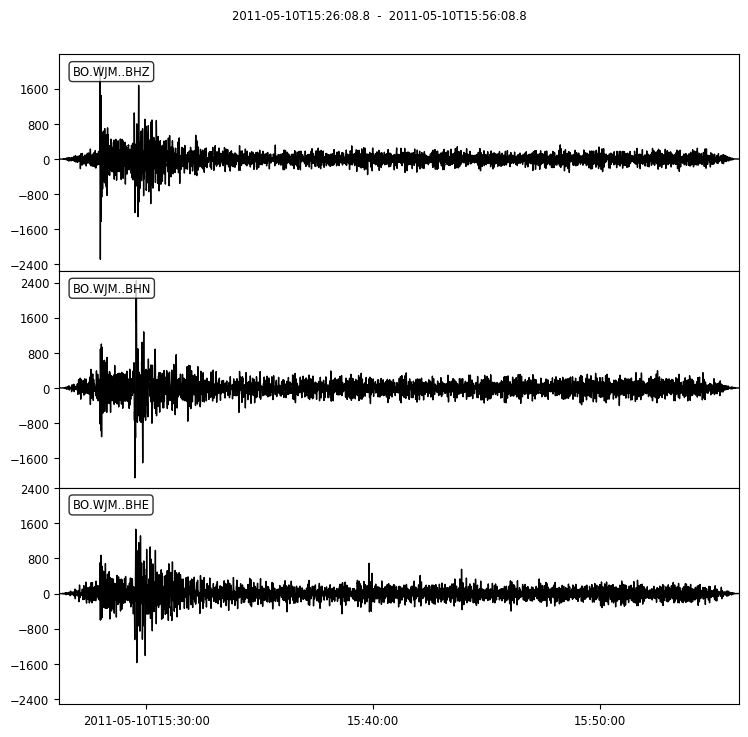

In [148]:
BO_WJM.plot();

## If we apply the frequency taper.

In [67]:
BO_WJM_freq_taper=BO_WJM.copy()

In [68]:
max_period=100
min_period=10
f2 = 1.0 / max_period
f3 = 1.0 / min_period
f1 = 0.8 * f2
f4 = 1.2 * f3
pre_filt = (f1, f2, f3, f4)

In [69]:
BO_WJM_freq_taper.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv, water_level=None)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples

In [70]:
BO_WJM_freq_taper.interpolate(sampling_rate=10)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

In [71]:
station_latitude = inv[0][0].latitude
station_longitude = inv[0][0].longitude

In [72]:
gcarc_m, baz, _ = gps2dist_azimuth(station_latitude, station_longitude,
                                         event_latitude, event_longitude)

In [73]:
baz = np.mod(baz, 360)
baz

325.30337840907623

In [74]:
BO_WJM_freq_taper.rotate(method="NE->RT", back_azimuth=baz)

3 Trace(s) in Stream:
BO.WJM..BHT | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHR | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

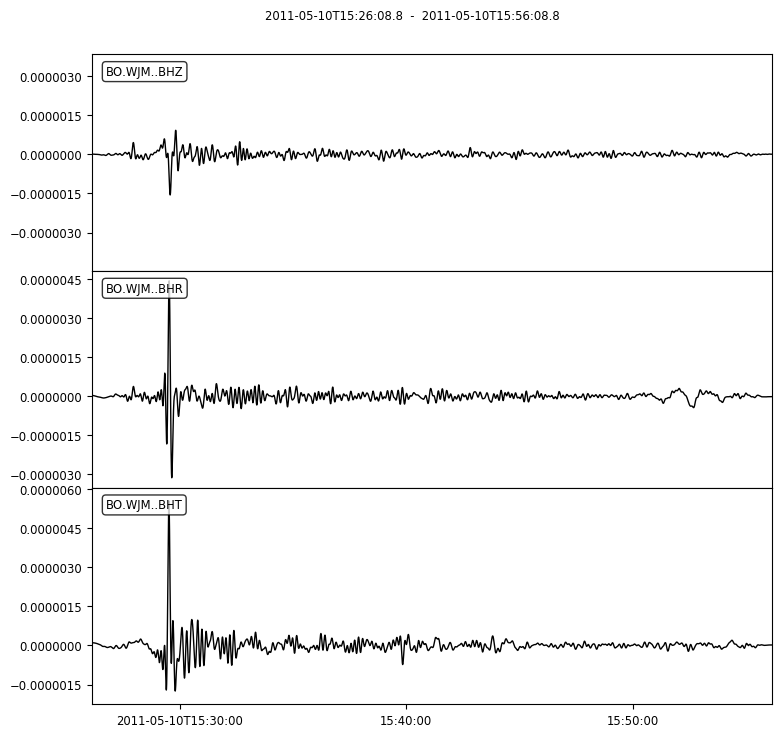

In [75]:
BO_WJM_freq_taper.plot();

In [76]:
gcarc_m,event_depth

(858413.1050612385, 564450.0)

In [77]:
arrivals = model.get_travel_times(source_depth_in_km=event_depth/1000,
                                  distance_in_degree=kilometer2degrees(gcarc_m/1000),
                                  phase_list=["S","s"])

In [78]:
for item in arrivals:
    print(item)

s phase arrival at 209.934 seconds


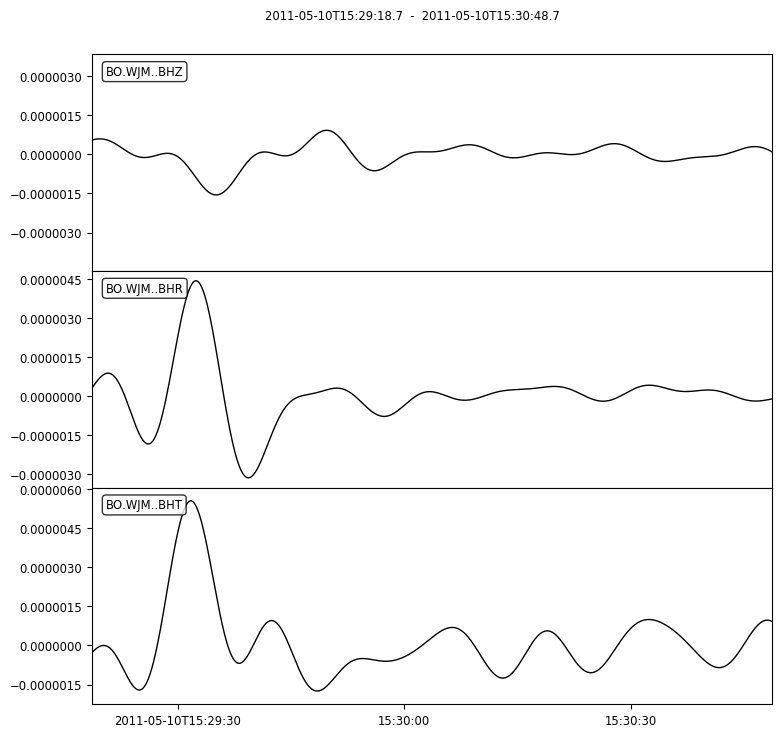

In [79]:
BO_WJM_freq_taper.slice(BO_WJM_freq_taper[0].stats.starttime+209.934-20,BO_WJM_freq_taper[0].stats.starttime+209.934+70).plot();

In [80]:
kilometer2degrees(gcarc_m/1000)

7.71989452185357

In [81]:
kilometer2degrees(gcarc_m/1000)*18+20,kilometer2degrees(gcarc_m/1000)*18+140

(158.95810139336427, 278.95810139336425)

In [82]:
to_plot=BO_WJM_freq_taper[2].slice(BO_WJM_freq_taper[2].stats.starttime+158.95810139336427,BO_WJM_freq_taper[2].stats.starttime+278.95810139336425)
data=to_plot.data
x=np.linspace(0,to_plot.stats.endtime-to_plot.stats.starttime,to_plot.stats.npts)

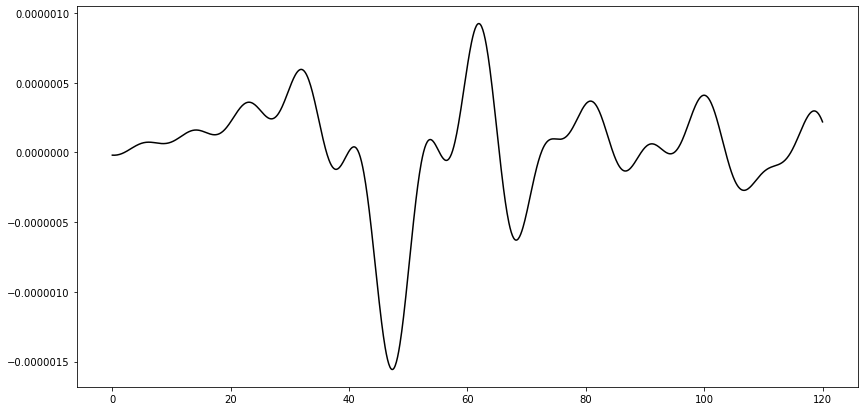

In [83]:
plt.figure(figsize=(14,7))
plt.plot(x,data,color="k")

## If we use a larger width of the frequency taper.

In [56]:
BO_WJM_freq_taper_large=BO_WJM.copy()

In [57]:
max_period=100
min_period=10
f2 = 1.0 / max_period
f3 = 1.0 / min_period
f1 = 0.5 * f2
f4 = 2.0 * f3
pre_filt = (f1, f2, f3, f4)

In [58]:
BO_WJM_freq_taper_large.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv, water_level=None)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples

In [59]:
BO_WJM_freq_taper_large.interpolate(sampling_rate=10)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

In [60]:
BO_WJM_freq_taper_large.rotate(method="NE->RT", back_azimuth=baz)

3 Trace(s) in Stream:
BO.WJM..BHT | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHR | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

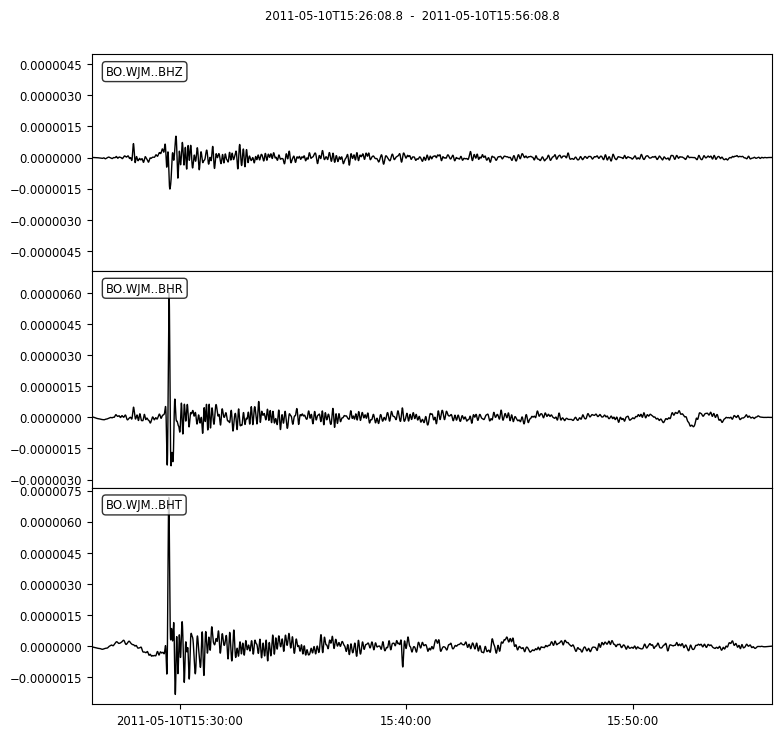

In [61]:
BO_WJM_freq_taper_large.plot();

In [64]:
to_plot_large=BO_WJM_freq_taper_large[2].slice(BO_WJM_freq_taper[2].stats.starttime+158.95810139336427,BO_WJM_freq_taper[2].stats.starttime+278.95810139336425)
data_large=to_plot_large.data
x=np.linspace(0,to_plot_large.stats.endtime-to_plot_large.stats.starttime,to_plot_large.stats.npts)

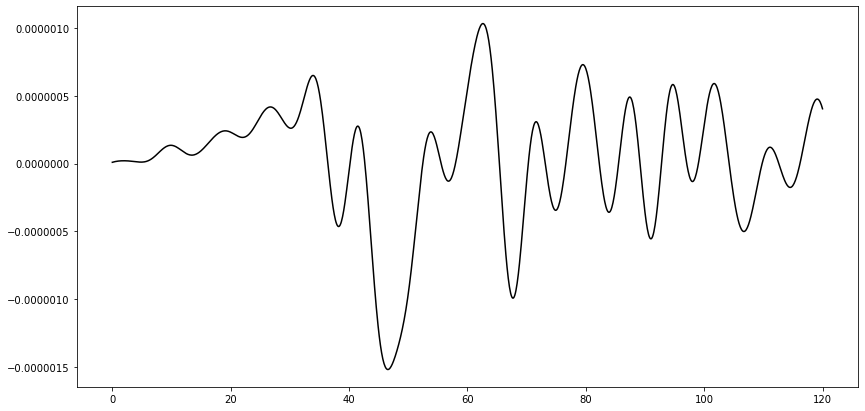

In [65]:
plt.figure(figsize=(14,7))
plt.plot(x,data_large,color="k")

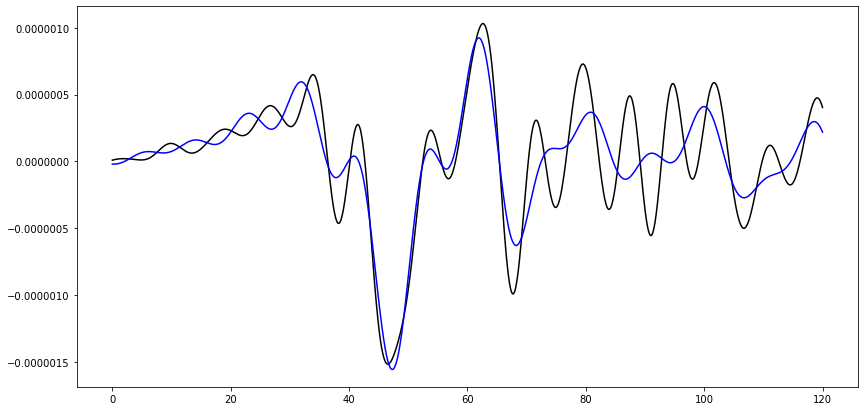

In [84]:
plt.figure(figsize=(14,7))
plt.plot(x,data_large,color="k")
plt.plot(x,data,color="b")

## test to use the bandpass filter.

In [85]:
BO_WJM_freq_bandpass=BO_WJM_freq_taper_large.copy()

In [86]:
BO_WJM_freq_bandpass.filter("bandpass",freqmin=1/100,freqmax=1/10,corners=2,zerophase=True)

3 Trace(s) in Stream:
BO.WJM..BHT | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHR | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

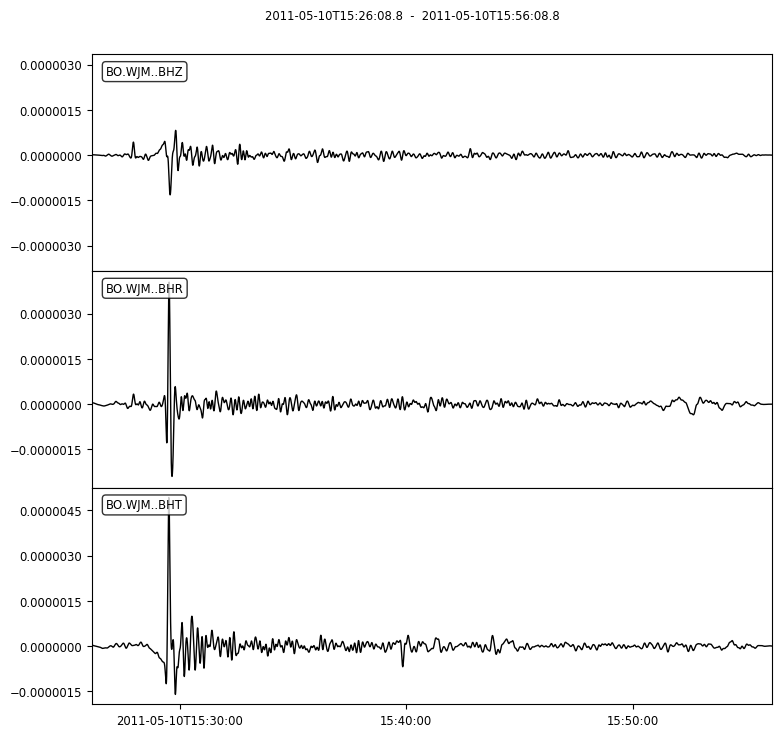

In [87]:
BO_WJM_freq_bandpass.plot();

In [90]:
to_plot_bandpass=BO_WJM_freq_bandpass[2].slice(BO_WJM_freq_bandpass[2].stats.starttime+158.95810139336427,BO_WJM_freq_bandpass[2].stats.starttime+278.95810139336425)
data_bandpass=to_plot_bandpass.data
x=np.linspace(20,to_plot_bandpass.stats.endtime-to_plot_bandpass.stats.starttime+20,to_plot_bandpass.stats.npts)

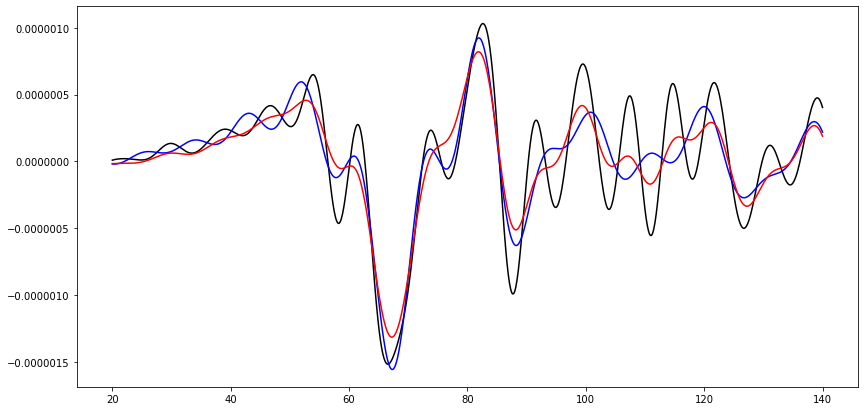

In [91]:
plt.figure(figsize=(14,7))
plt.plot(x,data_large,color="k")
plt.plot(x,data,color="b")
plt.plot(x,data_bandpass,color="r")

# Test some other frequency taper values.

In [113]:
BO_WJM_any=BO_WJM.copy()

In [114]:
max_period=200
min_period=1
f2 = 1.0 / max_period
f3 = 1.0 / min_period
f1 = 0.5 * f2
f4 = 2.0 * f3
pre_filt = (f1, f2, f3, f4)

In [115]:
BO_WJM_any.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv, water_level=None)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 20.0 Hz, 36001 samples

In [116]:
BO_WJM_any.interpolate(sampling_rate=10)

3 Trace(s) in Stream:
BO.WJM..BHE | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHN | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

In [117]:
BO_WJM_any.rotate(method="NE->RT", back_azimuth=baz)

3 Trace(s) in Stream:
BO.WJM..BHT | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHR | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

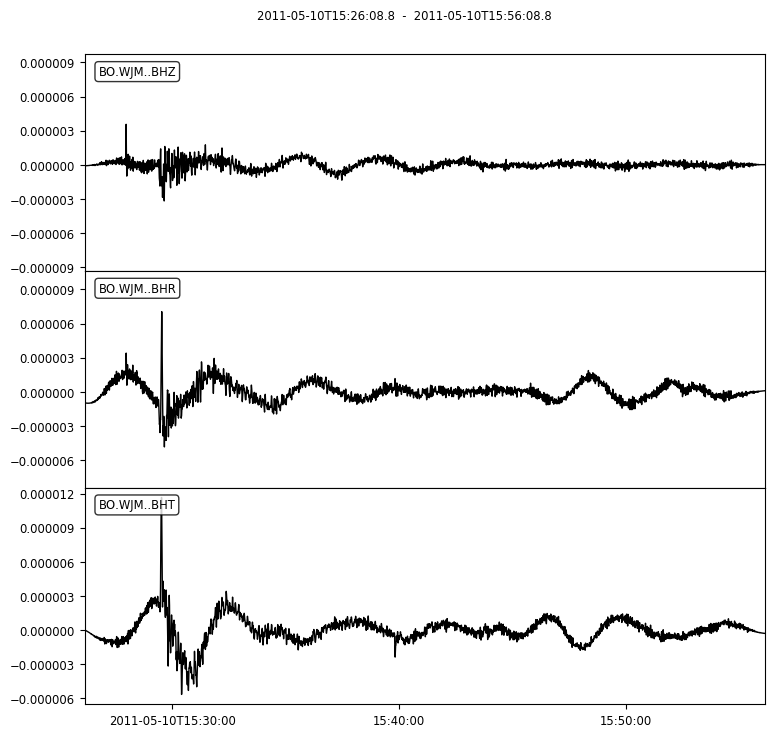

In [118]:
BO_WJM_any.plot();

In [119]:
BO_WJM_any.detrend("demean")
BO_WJM_any.detrend("linear")
BO_WJM_any.taper(max_percentage=0.05,type="hann")

In [120]:
BO_WJM_any.filter("bandpass",freqmin=1/100,freqmax=1/10,corners=2,zerophase=True)

3 Trace(s) in Stream:
BO.WJM..BHT | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHR | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples
BO.WJM..BHZ | 2011-05-10T15:26:08.800000Z - 2011-05-10T15:56:08.800000Z | 10.0 Hz, 18001 samples

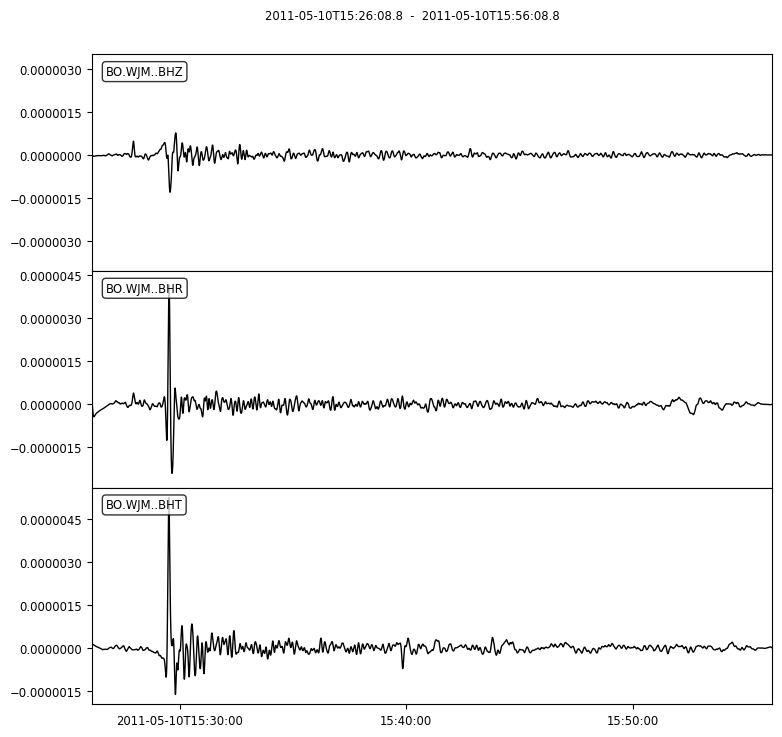

In [121]:
BO_WJM_any.plot();

In [122]:
to_plot_any=BO_WJM_any[2].slice(BO_WJM_any[2].stats.starttime+158.95810139336427,BO_WJM_any[2].stats.starttime+278.95810139336425)
data_any=to_plot_any.data
x=np.linspace(20,to_plot_bandpass.stats.endtime-to_plot_bandpass.stats.starttime+20,to_plot_bandpass.stats.npts)

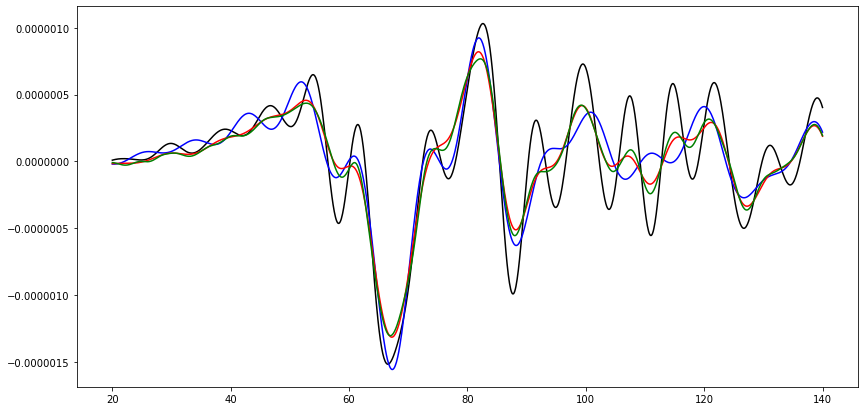

In [123]:
plt.figure(figsize=(14,7))
plt.plot(x,data_large,color="k")
plt.plot(x,data,color="b")
plt.plot(x,data_bandpass,color="r")
plt.plot(x,data_any,color="g")

## Compare with the old sync

In [125]:
BO_WJM_sync=sync_old.waveforms["BO.WJM"].sync.copy()

In [126]:
BO_WJM_sync.trim(event_time,event_time+1800)

3 Trace(s) in Stream:
BO.WJM.S3.MXR | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples
BO.WJM.S3.MXT | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples
BO.WJM.S3.MXZ | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples

In [127]:
BO_WJM_sync.detrend("demean")
BO_WJM_sync.detrend("linear")
BO_WJM_sync.taper(max_percentage=0.05,type="hann")

3 Trace(s) in Stream:
BO.WJM.S3.MXR | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples
BO.WJM.S3.MXT | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples
BO.WJM.S3.MXZ | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples

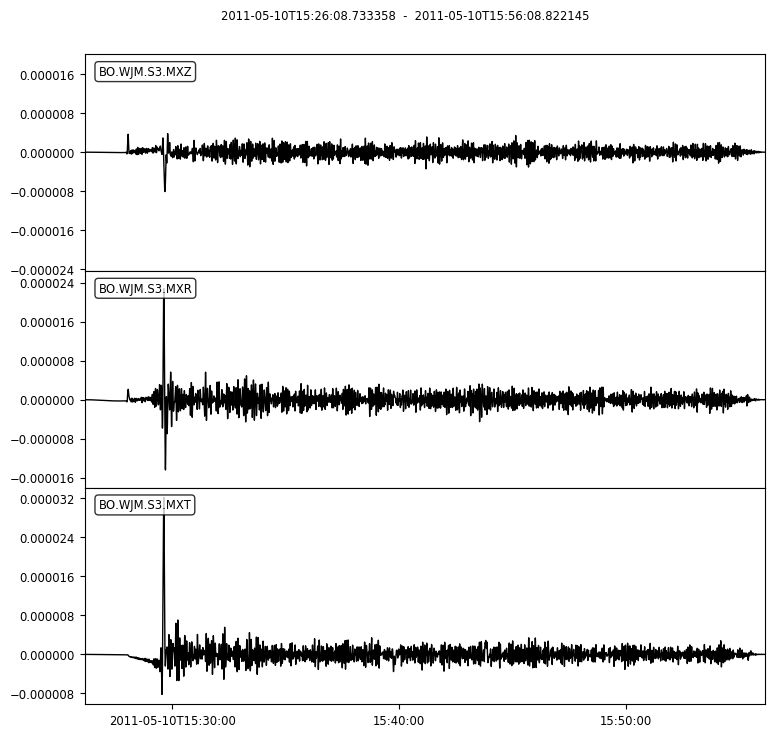

In [128]:
BO_WJM_sync.plot();

In [129]:
from obspy.signal.util import _npts2nfft
def sync_remove_response(pre_filt, st):
    """
    mimic obspy.remove_response, but only do the frequency taper
    """
    obspy.core.util.misc.limit_numpy_fft_cache()
    for trace in st:
        data = trace.data.astype(np.float64)
        npts = len(data)
        nfft = _npts2nfft(npts)
        data = np.fft.rfft(data, n=nfft)
        t_samp = trace.stats.delta
        fy = 1 / (t_samp * 2.0)
        freqs = np.linspace(0, fy, nfft // 2 + 1).astype(np.float64)
        freq_domain_taper = obspy.signal.invsim.cosine_sac_taper(
            freqs, flimit=pre_filt)
        data *= freq_domain_taper
        data = np.fft.irfft(data)[0:npts]
        trace.data = data

    return st


In [130]:
max_period=200
min_period=1
f2 = 1.0 / max_period
f3 = 1.0 / min_period
f1 = 0.5 * f2
f4 = 2.0 * f3
pre_filt = (f1, f2, f3, f4)

In [131]:
BO_WJM_sync=sync_remove_response(pre_filt,BO_WJM_sync)

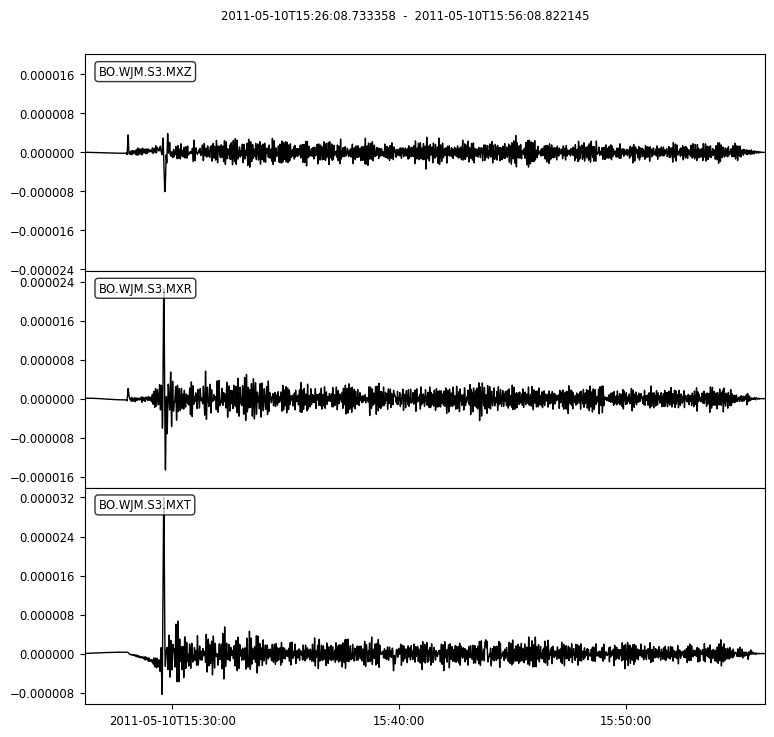

In [132]:
BO_WJM_sync.plot();

In [133]:
BO_WJM_sync.detrend("demean")
BO_WJM_sync.detrend("linear")
BO_WJM_sync.taper(max_percentage=0.05,type="hann")

3 Trace(s) in Stream:
BO.WJM.S3.MXR | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples
BO.WJM.S3.MXT | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples
BO.WJM.S3.MXZ | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.822145Z | 9.2 Hz, 16533 samples

In [134]:
BO_WJM_sync.interpolate(sampling_rate=10)

3 Trace(s) in Stream:
BO.WJM.S3.MXR | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.733358Z | 10.0 Hz, 18001 samples
BO.WJM.S3.MXT | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.733358Z | 10.0 Hz, 18001 samples
BO.WJM.S3.MXZ | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.733358Z | 10.0 Hz, 18001 samples

In [135]:
BO_WJM_sync.filter("bandpass",freqmin=1/100,freqmax=1/10,corners=2,zerophase=True)

3 Trace(s) in Stream:
BO.WJM.S3.MXR | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.733358Z | 10.0 Hz, 18001 samples
BO.WJM.S3.MXT | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.733358Z | 10.0 Hz, 18001 samples
BO.WJM.S3.MXZ | 2011-05-10T15:26:08.733358Z - 2011-05-10T15:56:08.733358Z | 10.0 Hz, 18001 samples

In [136]:
to_plot_sync=BO_WJM_sync[2].slice(BO_WJM_sync[2].stats.starttime+158.95810139336427,BO_WJM_sync[2].stats.starttime+278.95810139336425)
data_sync=to_plot_sync.data
x=np.linspace(20,to_plot_bandpass.stats.endtime-to_plot_bandpass.stats.starttime+20,to_plot_bandpass.stats.npts)

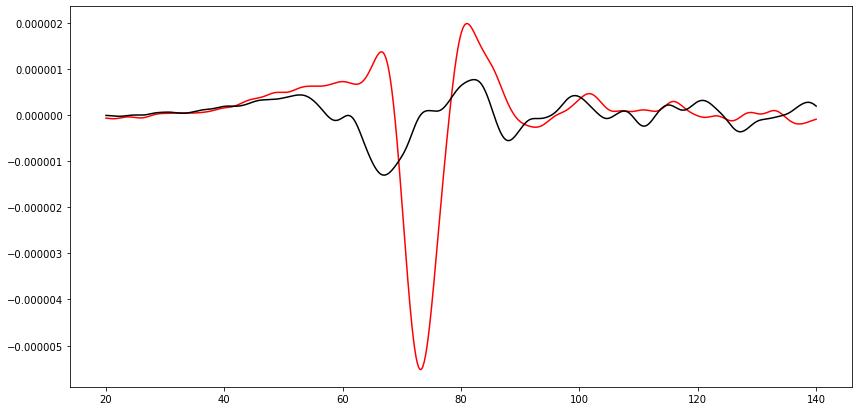

In [137]:
plt.figure(figsize=(14,7))
plt.plot(x,data_sync,color="r")
plt.plot(x,data_any,color="k")

## The mis match may related to the attenuation flag.